In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix

import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

STOPWORDS = stopwords.words('english')

#### Note: <br> 0: Reliable <br> 1: Unreliable

In [8]:
def load_df1():
    train = pd.read_csv('ds1/train.csv')
    train = train.fillna('')
    train['content'] = train['title'] + " " + train['author'] + " " + train['text']
    temp_label = train['label']
    train.drop(['id', 'title', 'author', 'label', 'text'], axis=1, inplace=True)
    train['label'] = temp_label

    return train 


,content,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [18]:
def load_df2():
    data = pd.read_csv('ds2/data.csv')
    data = data.fillna('')
    data['content'] = data['Headline'] + ' ' + data['Body']
    temp_label = data['Label']
    data.drop(['URLs', 'Headline', 'Body', 'Label'], axis=1, inplace=True)
    data["label"] = temp_label
    data['label'] = data['label'].apply(lambda x: 0 if x == 1 else 1)

    return data


,content,label
0,Four ways Bob Corker skewered Donald Trump Ima...,0
1,Linklater's war veteran comedy speaks to moder...,0
2,Trump’s Fight With Corker Jeopardizes His Legi...,0
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,0
4,Jason Aldean opens 'SNL' with Vegas tribute Co...,0
...,...,...
4004,Trends to Watch Trends to Watch\n% of readers ...,1
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,1
4006,"Ron Paul on Trump, Anarchism & the AltRight",1
4007,China to accept overseas trial data in bid to ...,0


In [33]:
def load_df3():
    true = pd.read_csv('ds3/True.csv')
    fake = pd.read_csv('ds3/Fake.csv')

    true = true.fillna('')
    fake = fake.fillna('')

    true['content'] = true['title'] + true['text']
    fake['content'] = fake['title'] + fake['text']

    true.drop(['title', 'text', 'subject', 'date'], axis=1, inplace=True)
    fake.drop(['title', 'text', 'subject', 'date'], axis=1, inplace=True)

    true['label'] = 0
    fake['label'] = 1

    data = pd.concat([true, fake], axis=0)

    #Shuffle Data
    data = data.sample(frac=1)

    #Reset the index
    data.reset_index(inplace=True)

    data.drop(['index'], axis=1, inplace=True)

    return data


In [34]:
df1, df2, df3 = load_df1(), load_df2(), load_df3()

In [35]:
df = pd.concat([df1, df2, df3], axis=0)

In [38]:
y = df.label
X = df.drop(['label'], axis=1)

### STEMMING:

A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
In simple words, Stemming is the process of reducing a word to its Root word.

### EXAMPLES:

actor, actress, acting --> act
eating, eats, eaten --> eat

In [40]:
port_stem = PorterStemmer()

In [41]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [42]:
X['content'] = X['content'].apply(stemming)

In [49]:
stemmed_df = pd.concat([X,y], axis=1)

#### Shuffling the data set

In [55]:
stemmed_df = stemmed_df.sample(frac=1)
stemmed_df = stemmed_df.reset_index()

In [56]:
stemmed_df.drop(['index'], axis=1, inplace=True)

In [57]:
stemmed_df.head()

,content,label
0,compli va resid refus obey leftist governor ba...,1
1,trump mock puerto rico hispan heritag speech h...,1
2,trump take first action cabinet declar day pat...,0
3,countri adopt plan offset air travel emiss new...,0
4,suffer pneumonia clinton fall ill memori cance...,0


### Vectorization

In [62]:
X = stemmed_df['content']
y = stemmed_df['label']

In [63]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

### Train Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.25, stratify=y)

accuracy:   0.971


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


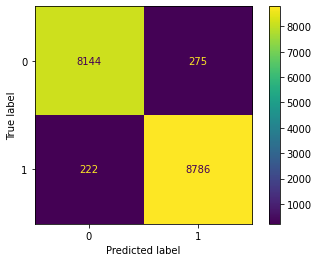

In [76]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X_train, y_train)
prediction2 = linear_clf.predict(X_test)
score = accuracy_score(y_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = confusion_matrix(y_test, prediction2)
plot_confusion_matrix(linear_clf, X_test, y_test)

### Pickle the Model

In [78]:
import pickle
filename = 'clf_model.sav'
pickle.dump(linear_clf, open(filename, 'wb'))

In [86]:
vec_filename = 'vectorizer.sav'
pickle.dump(vectorizer, open(vec_filename, 'wb') )

In [87]:
loaded_model = pickle.load(open('clf_model.sav', 'rb'))
loaded_vec = pickle.load(open('vectorizer.sav', 'rb'))


In [85]:
loaded_model.predict(X_test)
classification_report()

array([0, 1, 1, ..., 0, 1, 0])

### Creating a prediction function

In [ ]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [95]:
def make_prediction(model, vectorizer, input_text):

    #Transform to DataFrame
    input_text = {'content':[input_text]}
    input_text = pd.DataFrame(input_text)
    #Stem input text
    input_text['content'] = input_text['content'].apply(stemming)
    stemmed_text = input_text['content']

    #Vectorize 
    vec_text = vectorizer.transform(stemmed_text)

    #Predict
    pred = model.predict(vec_text)

    if pred == 0:
        return 'Reliable News'
    elif pred == 1:
        return 'Unreliable News'

In [98]:
input_text = """The second Covid-19 wave in India is now on the "downswing," the Centre said on Thursday, highlighting that the current number of active cases is still "very high" and advised states and Union territories (UTs) to not let down their guards."""
make_prediction(loaded_model, loaded_vec, input_text)

'Reliable News'